# Analisis Netflix  
**Librerias**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## carga de los datos

In [43]:
df = pd.read_csv('NetflixViewingHistory.csv', parse_dates=['Date'])

In [44]:
df.head()

,Title,Date
0,Barbie y los delfines mágicos,2020-06-18
1,Patrulla de cachorros: Temporada 2: Salvemos a...,2020-06-18
2,Anatomía según Grey: Temporada 14: Súbete a mi...,2020-06-17
3,Anatomía según Grey: Temporada 14: Zona de pel...,2020-06-17
4,Dark: Temporada 2: Materia oscura,2020-06-16


In [45]:
#Cantidad de filas y columnas
df.shape

(3729, 2)

In [46]:
#Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3729 entries, 0 to 3728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Title   3729 non-null   object        
 1   Date    3729 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 58.4+ KB


In [47]:
#Fechas Min y max
print('start: ',df.Date.min())
print('end: ',df.Date.max())

start:  2016-03-12 00:00:00
end:  2021-12-01 00:00:00


**Comentario**  
- existe un patron en el titulo que divide en partes por medio de los dos puntos

In [48]:
#sepracion del titulo en columnas
separacion= df.Title.str.split(pat =':', expand=False).to_frame()
separacion.head()

,Title
0,[Barbie y los delfines mágicos]
1,"[Patrulla de cachorros, Temporada 2, Salvemo..."
2,"[Anatomía según Grey, Temporada 14, Súbete a..."
3,"[Anatomía según Grey, Temporada 14, Zona de ..."
4,"[Dark, Temporada 2, Materia oscura]"


In [49]:
#Conteo del numero de las partes
separacion['num_partes'] = separacion.Title.apply(len)
separacion.head()

,Title,num_partes
0,[Barbie y los delfines mágicos],1
1,"[Patrulla de cachorros, Temporada 2, Salvemo...",3
2,"[Anatomía según Grey, Temporada 14, Súbete a...",3
3,"[Anatomía según Grey, Temporada 14, Zona de ...",3
4,"[Dark, Temporada 2, Materia oscura]",3


In [50]:
#Cantar el numero de partes
separacion.num_partes.value_counts()

3    2933
4     317
1     236
2     190
5      49
6       4
Name: num_partes, dtype: int64

In [51]:
#Verificar la lista de los numeros de las partes filtrar
separacion[separacion.num_partes==3].head(10)

,Title,num_partes
1,"[Patrulla de cachorros, Temporada 2, Salvemo...",3
2,"[Anatomía según Grey, Temporada 14, Súbete a...",3
3,"[Anatomía según Grey, Temporada 14, Zona de ...",3
4,"[Dark, Temporada 2, Materia oscura]",3
5,"[Dark, Temporada 2, Principios y finales]",3
6,"[Anatomía según Grey, Temporada 14, Una pata...",3
7,"[Anatomía según Grey, Temporada 14, Hazlo a ...",3
8,"[Anatomía según Grey, Temporada 14, Empezar ...",3
10,"[Élite, Temporada 3, Rebeca]",3
11,"[Gotham, Temporada 1, Piloto]",3


In [52]:
separacion[separacion.num_partes==1].head(10)

,Title,num_partes
0,[Barbie y los delfines mágicos],1
9,[365 días],1
26,[Toy Story],1
41,[The Innocents],1
42,[Playing for Time],1
55,[Toy Story 2],1
56,[Bailarina],1
61,[Madagascar],1
95,[Intensamente],1
105,[Toy Story 3],1


In [53]:
separacion[separacion.num_partes==2].head(10)

,Title,num_partes
40,"[Trolls, Vamos a festejar]",2
51,"[El Gato con Botas, Atrapado en un cuento épico]",2
72,"[Poco ortodoxa, Detrás de cámaras]",2
89,"[Batman vs Superman, El origen de la justicia]",2
90,"[Baywatch, Guardianes de la bahía]",2
92,"[La casa de papel, El fenómeno]",2
104,"[Space Jam, El juego del siglo]",2
135,"[Misión imposible, Protocolo fantasma]",2
136,"[Misión, imposible 5 - Nación secreta]",2
202,"[Code 8, Renegados]",2


In [54]:
separacion[separacion.num_partes==4].head(10)

,Title,num_partes
34,"[Historia, Nivel 1, Temporada 1, La comida ...",4
35,"[Historia, Nivel 1, Temporada 1, El SIDA]",4
36,"[Miraculous, Las aventuras de Ladybug, Tempo...",4
37,"[Miraculous, Las aventuras de Ladybug, Tempo...",4
43,"[Historia, Nivel 1, Temporada 1, La energía...",4
44,"[Historia, Nivel 1, Temporada 1, Los plásti...",4
45,"[Historia, Nivel 1, Temporada 1, El petróle...",4
52,"[Historia, Nivel 1, Temporada 1, La genética]",4
58,"[Historia, Nivel 1, Temporada 1, China en l...",4
62,"[Historia, Nivel 1, Temporada 1, La carrera...",4


## Crear variables

### Variables derivadas del titulo

In [55]:
#Crear la column tipo: cuando el numero de partes sea menor a tres 
#consideramos como pelicula lo de mas sera una serie
separacion['tipo'] = np.where(separacion.num_partes<3,'pelicula','serie')
separacion.head()

,Title,num_partes,tipo
0,[Barbie y los delfines mágicos],1,pelicula
1,"[Patrulla de cachorros, Temporada 2, Salvemo...",3,serie
2,"[Anatomía según Grey, Temporada 14, Súbete a...",3,serie
3,"[Anatomía según Grey, Temporada 14, Zona de ...",3,serie
4,"[Dark, Temporada 2, Materia oscura]",3,serie


In [56]:
separacion.tipo.value_counts()

serie       3303
pelicula     426
Name: tipo, dtype: int64

In [57]:
separacion.num_partes.value_counts()

3    2933
4     317
1     236
2     190
5      49
6       4
Name: num_partes, dtype: int64

In [58]:
#unir la calumna tipo de separacion al df
df = pd.concat([df, separacion['tipo']], axis = 1)
df.head()

,Title,Date,tipo
0,Barbie y los delfines mágicos,2020-06-18,pelicula
1,Patrulla de cachorros: Temporada 2: Salvemos a...,2020-06-18,serie
2,Anatomía según Grey: Temporada 14: Súbete a mi...,2020-06-17,serie
3,Anatomía según Grey: Temporada 14: Zona de pel...,2020-06-17,serie
4,Dark: Temporada 2: Materia oscura,2020-06-16,serie


In [59]:
#Dividir los tipos en sus diferentes niveles
separacion_cols = df.Title.str.split(':', expand=True)
#Renombrar las columnas
separacion_cols.columns= ['Titulo', 'nivel1','nivel2','nivel3', 'nivel4', 'nivel5']
separacion_cols.head()

,Titulo,nivel1,nivel2,nivel3,nivel4,nivel5
0,Barbie y los delfines mágicos,None,None,None,None,None
1,Patrulla de cachorros,Temporada 2,Salvemos a los pingüinos / El rescate del delfín,None,None,None
2,Anatomía según Grey,Temporada 14,"Súbete a mi barco, cariño",None,None,None
3,Anatomía según Grey,Temporada 14,Zona de peligro,None,None,None
4,Dark,Temporada 2,Materia oscura,None,None,None


In [60]:
#Unir al dataset
df =pd.concat([df, separacion_cols[['Titulo','nivel1','nivel2','nivel3']]], axis =1)
df.head()

,Title,Date,tipo,Titulo,nivel1,nivel2,nivel3
0,Barbie y los delfines mágicos,2020-06-18,pelicula,Barbie y los delfines mágicos,None,None,None
1,Patrulla de cachorros: Temporada 2: Salvemos a...,2020-06-18,serie,Patrulla de cachorros,Temporada 2,Salvemos a los pingüinos / El rescate del delfín,None
2,Anatomía según Grey: Temporada 14: Súbete a mi...,2020-06-17,serie,Anatomía según Grey,Temporada 14,"Súbete a mi barco, cariño",None
3,Anatomía según Grey: Temporada 14: Zona de pel...,2020-06-17,serie,Anatomía según Grey,Temporada 14,Zona de peligro,None
4,Dark: Temporada 2: Materia oscura,2020-06-16,serie,Dark,Temporada 2,Materia oscura,None


### Variables derivadas de la fecha

In [61]:
#cololocar la fecha como indice
df.set_index('Date', inplace =True)
df.head(2)

,Title,tipo,Titulo,nivel1,nivel2,nivel3
Date,,,,,,
2020-06-18,Barbie y los delfines mágicos,pelicula,Barbie y los delfines mágicos,None,None,None
2020-06-18,Patrulla de cachorros: Temporada 2: Salvemos a...,serie,Patrulla de cachorros,Temporada 2,Salvemos a los pingüinos / El rescate del delfín,None


In [62]:
#Funcion parat extraer de la fecha los componentes (año, mes.....)
def ext_fecha(data):
    data['año'] = data.index.year
    data['mes'] = data.index.month_name()
    data['mes_num'] = data.index.month
    data['dia_mes'] = data.index.day
    data['dia_semana'] =data.index.day_name()
    return data

In [63]:
ext_fecha(df)

,Title,tipo,Titulo,nivel1,nivel2,nivel3,año,mes,mes_num,dia_mes,dia_semana
Date,,,,,,,,,,,
2020-06-18,Barbie y los delfines mágicos,pelicula,Barbie y los delfines mágicos,None,None,None,2020,June,6,18,Thursday
2020-06-18,Patrulla de cachorros: Temporada 2: Salvemos a...,serie,Patrulla de cachorros,Temporada 2,Salvemos a los pingüinos / El rescate del delfín,None,2020,June,6,18,Thursday
2020-06-17,Anatomía según Grey: Temporada 14: Súbete a mi...,serie,Anatomía según Grey,Temporada 14,"Súbete a mi barco, cariño",None,2020,June,6,17,Wednesday
2020-06-17,Anatomía según Grey: Temporada 14: Zona de pel...,serie,Anatomía según Grey,Temporada 14,Zona de peligro,None,2020,June,6,17,Wednesday
2020-06-16,Dark: Temporada 2: Materia oscura,serie,Dark,Temporada 2,Materia oscura,None,2020,June,6,16,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,Las chicas del cable: Temporada 1: Capítulo 5:...,serie,Las chicas del cable,Temporada 1,Capítulo 5,El pasado,2019,June,6,30,Sunday
2019-06-30,Las chicas del cable: Temporada 1: Capítulo 4:...,serie,Las chicas del cable,Temporada 1,Capítulo 4,Los sentimientos,2019,June,6,30,Sunday
2019-06-30,Las chicas del cable: Temporada 1: Capítulo 3:...,serie,Las chicas del cable,Temporada 1,Capítulo 3,Las mentiras,2019,June,6,30,Sunday


## Análisis

### Cuanto tiempo lleva contratado netflix

In [64]:
from datetime import date

In [65]:
# crear variable de fecha el dia de hoy
hoy = pd.Timestamp(date.today())

#Buscar el primer dia de fecha de inicio
primer_dia = df.index.min()

#Calcular el tiempo
tiempo = hoy - primer_dia

print('El tiempo que llevas usando de Netflix es de {} dias'.format(tiempo.days))

El tiempo que llevas usando de Netflix es de 2908 dias


### Cuanto gasto en Netflixt
- El costo de netflix es de mesual: US$6.99
- tasa del peso es de 58.61

In [66]:
costo_mensual = 6.99
conversion = 6.99 * 58.61 
gasto = tiempo.days/30 * costo_mensual
en_pesos = tiempo.days/30 * conversion
print('El gasto hasta ahora es de U${} en pesos es de ${}'.format(gasto, en_pesos))

El gasto hasta ahora es de U$677.5640000000001 en pesos es de $39712.026040000004


### Que tiempo le dedicas a Netflix  
- Suponemos que una serie dura 45 minutos y una pelicula 100 minutos

In [67]:
serie = 45
pelicula = 100

In [68]:
consumo = df['tipo'].value_counts()
consumo

serie       3303
pelicula     426
Name: tipo, dtype: int64

In [69]:
#calcular el minuto por peliculas
min_peli = consumo['pelicula'] * pelicula

#calcular el minuto por seires
min_serie = consumo['serie'] * serie

#calcular al año
peli_ano = min_peli /60/24
serie_ano = min_serie /60/24

print('Al año le dedicas {} dias en series y en peliculas le dedicas {} dias'.format(round(serie_ano),
                                                                                     round(peli_ano)))

Al año le dedicas 103 dias en series y en peliculas le dedicas 30 dias


### Cuales son las 10 series que has visto mas?

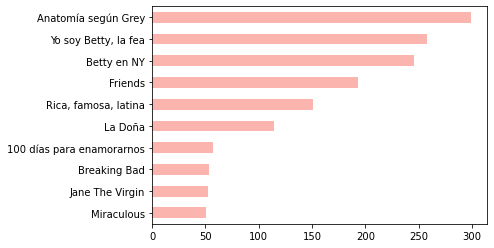

In [70]:
df[df.tipo =='serie'].Titulo.value_counts().head(10).sort_values(ascending =True).plot.barh(cmap = 'Pastel1');

### Cuales peliculas has visto mas?

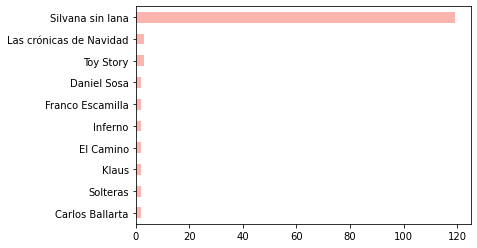

Silvana sin lana           119
Toy Story                    3
Las crónicas de Navidad      3
Carlos Ballarta              2
Solteras                     2
Klaus                        2
El Camino                    2
Inferno                      2
Franco Escamilla             2
Daniel Sosa                  2
Name: Titulo, dtype: int64


In [71]:
df[df.tipo =='pelicula'].Titulo.value_counts().head(10).sort_values(ascending =True).plot.barh(cmap = 'Pastel1')
plt.show()
print(df[df.tipo =='pelicula'].Titulo.value_counts().head(10))

### Dia de la semana de mayor consumo?

In [72]:
df.columns

Index(['Title', 'tipo', 'Titulo', 'nivel1', 'nivel2', 'nivel3', 'año', 'mes',
       'mes_num', 'dia_mes', 'dia_semana'],
      dtype='object')

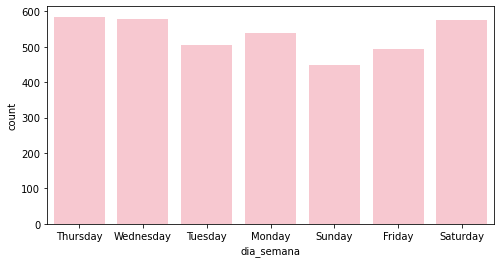

Thursday     585
Wednesday    580
Saturday     576
Monday       540
Tuesday      505
Friday       494
Sunday       449
Name: dia_semana, dtype: int64


In [73]:
plt.figure(figsize = [8,4])
sns.countplot(x = df.dia_semana, color= 'pink')
plt.show()

print(df.dia_semana.value_counts())

### existen diferencias entre series y peliculas

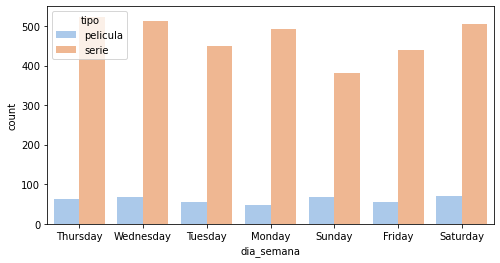

In [74]:
plt.figure(figsize = [8,4])
sns.countplot(x = df.dia_semana, hue = df.tipo, palette='pastel')
plt.show()

### Distribucion de las peliculas y series a lo largo del tiempo

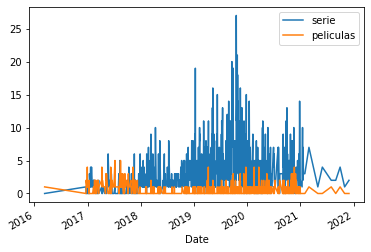

In [123]:
s = df[['tipo']].replace('serie', 1).replace('pelicula',0)
p = df[['tipo']].replace('serie', 0).replace('pelicula',1)

s.groupby(s.index)['tipo'].sum().plot(kind = 'line', label= 'serie')
p.groupby(s.index)['tipo'].sum().plot(kind = 'line', label = 'peliculas')

plt.legend()
plt.show()

### El consumo a lo largo del año es constante o hay meses de mayor consumo

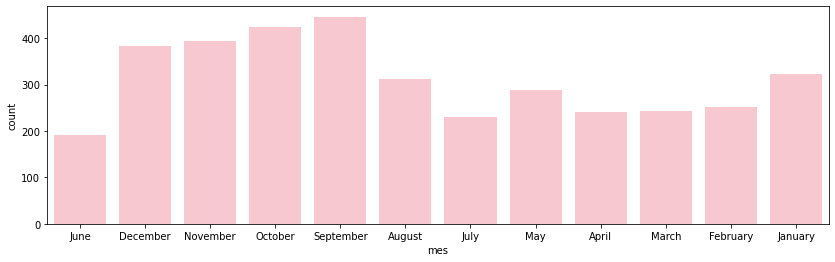

September    446
October      423
November     394
December     384
January      323
August       312
May          289
February     251
March        244
April        241
July         231
June         191
Name: mes, dtype: int64


In [75]:
plt.figure(figsize = [14,4])
sns.countplot(x = df.mes, color ='pink')
plt.show()
print(df.mes.value_counts())

### Año de mayor consumo

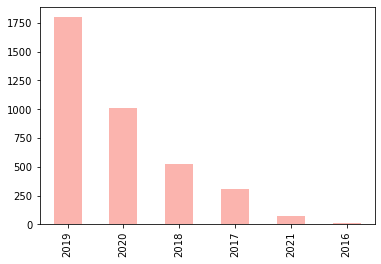

2019    1799
2020    1009
2018     526
2017     309
2021      76
2016      10
Name: año, dtype: int64


In [76]:
df.año.value_counts().plot.bar(cmap = 'Pastel1')
plt.show()
print(df.año.value_counts())

## Exportar Datos

In [77]:
df.to_excel('data.xlsx')